In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.util import ngrams
import string
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phyllis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/phyllis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/phyllis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# EXERCISE 2
#Q1. load raw dataset and remove duplicate
NYT = pd.read_csv("NYT_headlines.csv", index_col = 0, header = 0).drop_duplicates()

In [3]:
stop = set(stopwords.words('english')) #This list may not be sufficent. There are a lot of stopwords list on the internet.
exclude = set((string.punctuation, "’", "‘", "(", ".", ",", ":",")"))
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    numb_free = ''.join([i for i in stop_free if not i.isdigit()])
    punc_free = ''.join(ch for ch in numb_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
### Clean data with Lemmatize
doc1 = NYT['Headlines'].str.lower()
for i in range(len(doc1)):
    NYT['Headlines'].values[i]=clean(doc1.iloc[i])
    #change the date format
    if 'March' in NYT['date'].values[i]:
        NYT['date'].values[i] = pd.to_datetime(NYT['date'].iloc[i], format = '%B %d').strftime('%m-%d')
    elif 'Feb' in NYT['date'].values[i]:
        NYT['date'].values[i] = pd.to_datetime(NYT['date'].iloc[i], format = '%b. %d').strftime('%m-%d')
    #special change for words
    if 'bidens' in NYT['Headlines'].values[i]:
        NYT['Headlines'].values[i] = NYT['Headlines'].values[i].replace('bidens','biden')

In [4]:
# Q2. Build a vocabulary of Covid-19 related words.
covid_lst = ['COVID', 'Coronavirus', 'pandemic', 'vaccine', 'virus', 'quarantine', 'vaccination']

In [5]:
# Q3. build a daily covid related index
# clean the vocabulary
lst_covid = []
for word in covid_lst:
    lst_covid.append(clean(word))

# check for each headline, if there is a word in the vocabulary of Covid-19 related words occurs in the headline; As long as there is one word exists, then increase the count varible and jump out of the loop.
lst_count_covid = []
for i in range(len(NYT['Headlines'])):
    count = 0
    for word in lst_covid:
        if word in NYT['Headlines'].iloc[i]:
            count+=1
            break
    lst_count_covid.append(count)

# add count_covid to the dataframe and calculate the index for each day
NYT['count_covid'] = lst_count_covid
index_num_per_day_covid= NYT.groupby('date')['count_covid'].sum()
total_num_per_day_covid = NYT.groupby('date')['Headlines'].count()
covid_uncertainty_index = index_num_per_day_covid/total_num_per_day_covid
# below is the result of the covid_uncertainty_index for each day
print(covid_uncertainty_index)

date
02-01    0.083333
02-02    0.156250
02-03    0.138889
02-04    0.064516
02-05    0.080000
02-06    0.142857
02-07    0.117647
02-08    0.178571
02-09    0.076923
02-10    0.093023
02-11    0.222222
02-12    0.233333
02-13    0.000000
02-14    0.062500
02-15    0.000000
02-16    0.133333
02-17    0.038462
02-18    0.150000
02-19    0.214286
02-20    0.000000
02-21    0.083333
02-22    0.217391
02-23    0.031250
02-24    0.103448
02-25    0.115385
02-26    0.086957
02-27    0.181818
02-28    0.166667
03-01    0.230769
03-02    0.129032
03-03    0.117647
03-04    0.090909
03-05    0.041667
03-06    0.111111
03-07    0.058824
03-08    0.187500
03-09    0.095238
03-10    0.172414
03-11    0.135135
03-12    0.200000
dtype: float64


In [6]:
# Q4. construct a daily economic policy uncertainty index (coarse economic policy uncertainty index)
eco_policy_lst = ['uncertainty', 'uncertain', 'economic', 'economy', 'Congress','deficit','federal reserve', 'legislation', 'regulation', 'white house', 'uncertainties', 'regulatory', 'the fed']
# clean the vocabulary
lst = []
for word in eco_policy_lst:
    lst.append(clean(word))

# check for each headline, if there is a word in the vocabulary of economic policy related words occurs in the headline; As long as there is one word exists, then increase the count varible and jump out of the loop.
lst_count = []
for i in range(len(NYT['Headlines'])):
    count = 0
    for word in lst:
        if word in NYT['Headlines'].iloc[i]:
            count+=1
            break
    lst_count.append(count)

# add count_eco to the dataframe and calculate the index for each day
NYT['count_eco'] = lst_count
index_num_per_day= NYT.groupby('date')['count_eco'].sum()
total_num_per_day = NYT.groupby('date')['Headlines'].count()
economic_policy_uncertainty_index = index_num_per_day/total_num_per_day
# below is the result of the economic_policy_uncertainty_index for each day
print(economic_policy_uncertainty_index)

date
02-01    0.083333
02-02    0.031250
02-03    0.055556
02-04    0.032258
02-05    0.040000
02-06    0.000000
02-07    0.000000
02-08    0.000000
02-09    0.000000
02-10    0.023256
02-11    0.055556
02-12    0.000000
02-13    0.095238
02-14    0.000000
02-15    0.000000
02-16    0.100000
02-17    0.000000
02-18    0.050000
02-19    0.107143
02-20    0.000000
02-21    0.000000
02-22    0.086957
02-23    0.062500
02-24    0.034483
02-25    0.076923
02-26    0.086957
02-27    0.000000
02-28    0.000000
03-01    0.038462
03-02    0.064516
03-03    0.058824
03-04    0.000000
03-05    0.000000
03-06    0.000000
03-07    0.000000
03-08    0.062500
03-09    0.095238
03-10    0.103448
03-11    0.108108
03-12    0.000000
dtype: float64


In [7]:
# Q5. calculate return on S&P500
SP = pd.read_csv("SP500.csv", index_col = 0, header = 0)
# use rate of return formula: rate of return = (adj_close in t+1)/(adj_close in t) - 1
SP['Adj Close**'] = SP['Adj Close**'].apply(lambda x: float(x.split()[0].replace(',', '')))
SP['returns'] = SP['Adj Close**'] / SP['Adj Close**'].shift(1) - 1
print(SP)

               Open      High       Low    Close*  Adj Close**         Volume  \
Date                                                                            
12-Mar-21  3,924.52  3,944.99  3,915.21  3,943.34      3943.34  4,469,240,000   
11-Mar-21  3,915.54  3,960.27  3,915.54  3,939.34      3939.34  5,300,010,000   
10-Mar-21  3,891.99  3,917.35  3,885.73  3,898.81      3898.81  5,827,250,000   
9-Mar-21   3,851.93  3,903.76  3,851.93  3,875.44      3875.44  5,496,340,000   
8-Mar-21   3,844.39  3,881.06  3,819.25  3,821.35      3821.35  5,852,240,000   
5-Mar-21   3,793.58  3,851.69  3,730.19  3,841.94      3841.94  6,842,570,000   
4-Mar-21   3,818.53  3,843.67  3,723.34  3,768.47      3768.47  7,142,240,000   
3-Mar-21   3,863.99  3,874.47  3,818.86  3,819.72      3819.72  6,150,790,000   
2-Mar-21   3,903.64  3,906.41  3,868.57  3,870.29      3870.29  5,493,690,000   
1-Mar-21   3,842.51  3,914.50  3,842.51  3,901.82      3901.82  5,071,540,000   
26-Feb-21  3,839.66  3,861.0

                                   covid_uncertainty_index  \
covid_uncertainty_index                           1.000000   
economic_policy_uncertainty_index                 0.220230   
return                                            0.134305   

                                   economic_policy_uncertainty_index    return  
covid_uncertainty_index                                     0.220230  0.134305  
economic_policy_uncertainty_index                           1.000000 -0.153477  
return                                                     -0.153477  1.000000  


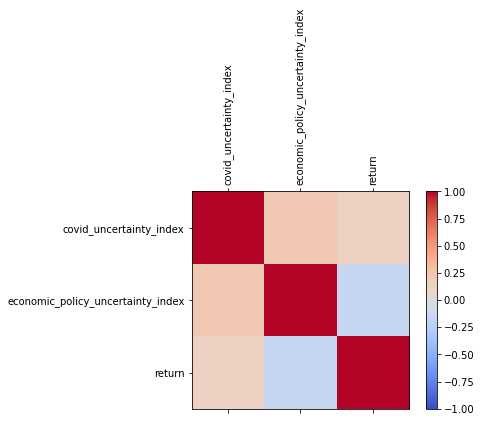

<AxesSubplot:>

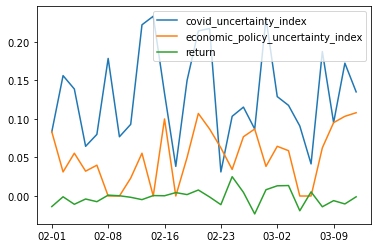

In [8]:
# Q6. Using a plot and simple correlations, exhibit the link between the Covid uncertainty index, the coarse economic policy index and the returns.\

#create a new dataframe only included rate of return
ror = SP['returns'].reset_index(level=0)
ror['Date'] = pd.to_datetime(ror["Date"]).dt.strftime('%m-%d') # change the date format
ror = ror.set_index(['Date'])

# combine two index dataframes with the returns dataframe
index_df = pd.concat([covid_uncertainty_index, economic_policy_uncertainty_index, ror], axis = 1).dropna()
index_df.columns = ['covid_uncertainty_index', 'economic_policy_uncertainty_index', 'return']

# find the correlation between those three varibales
corr = index_df.corr()
print(corr) # print the correlation matrix

# create a plot to show the correlations matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(index_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(index_df.columns)
ax.set_yticklabels(index_df.columns)
plt.show()

#plot two indexes and the returns.
index_df.plot()

In [9]:
# Q8. Splitting periods of positive returns from those of negative returns, carefully show the words from the headlines that tend to be related to each category
ror = ror.reset_index()
ror = ror.rename(columns = {"Date":'date', "return":'return'})
## merge return to the NYT dataset
left_merged = pd.merge( NYT, ror, how="left", on=["date"])
## drop na
left_merged = left_merged.dropna()

## split into two datasets
positive_headlines = []
negative_headlines = []
for i in range(len(left_merged)):
    if left_merged['returns'].values[i] >= 0:
        positive_headlines.append(left_merged['Headlines'].values[i])
    else:
        negative_headlines.append(left_merged['Headlines'].values[i])
positive_headlines = [clean(doc).split() for doc in positive_headlines]
negative_headlines = [clean(doc).split() for doc in negative_headlines]

#### find frequency of words
from collections import Counter
# for positive returns
flat_list_pos = [item for sublist in positive_headlines for item in sublist]
diction_pos=Counter(flat_list_pos)
print("the words for positive returns:", diction_pos.most_common(15))

# for negative returns
flat_list_neg = [item for sublist in negative_headlines for item in sublist]
diction_neg=Counter(flat_list_neg)
print("the words for negative returns:", diction_neg.most_common(15))

the words for positive returns: [('trump', 60), ('biden', 60), ('capitol', 23), ('trial', 22), ('impeachment', 20), ('say', 18), ('coronavirus', 18), ('house', 17), ('vaccine', 17), ('riot', 16), ('democrat', 16), ('briefing', 16), ('senate', 15), ('happened', 13), ('today', 13)]
the words for negative returns: [('biden', 92), ('trump', 57), ('capitol', 30), ('house', 26), ('new', 22), ('say', 22), ('riot', 21), ('republican', 21), ('u', 20), ('first', 19), ('briefing', 19), ('senate', 19), ('coronavirus', 18), ('happened', 17), ('stimulus', 17)]


/var/folders/7l/7mkg7y656rs1vbj3qqps28240000gn/T/ipykernel_43136/3488650110.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_gram['word'].iloc[i] = convertTuple(n_gram['word'].iloc[i])


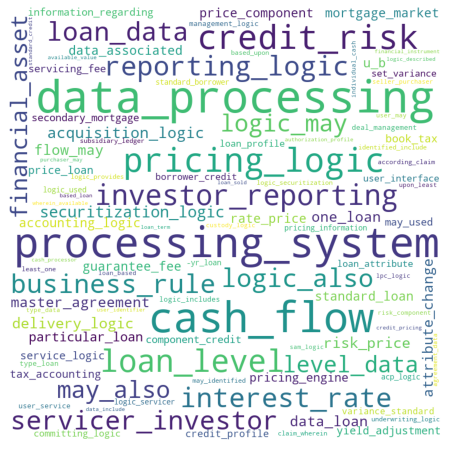

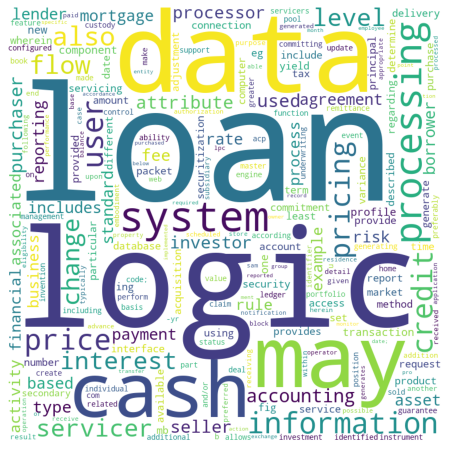

/var/folders/7l/7mkg7y656rs1vbj3qqps28240000gn/T/ipykernel_43136/3488650110.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigram['word'].iloc[i] = convertTuple(trigram['word'].iloc[i])


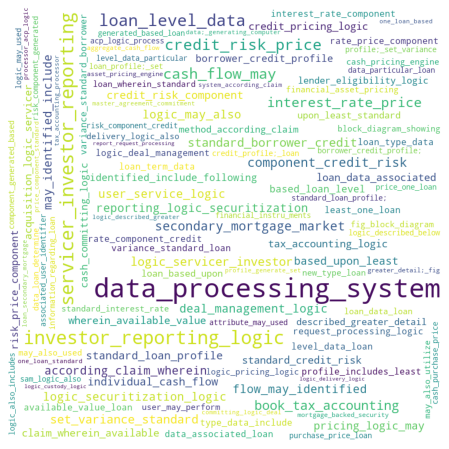

In [10]:
# Exercise 3
### Worldcloud
from wordcloud import WordCloud
# read file
from PyPDF2 import PdfReader

reader = PdfReader("US7809633.pdf")
combine = ''
for page in reader.pages[9:24]:
    combine += page.extract_text()
text=[combine]
doc_clean = [clean(doc).split() for doc in text] #list of list

flat_list = []
for sublist in doc_clean:
    flat_list.extend(sublist)
diction=Counter(flat_list)
diction.most_common(10)
flat_string=" ".join([i for i in flat_list])
## create n-gram word cloud when n = 2 -> bigram word cloud
n_gram = (pd.Series(nltk.ngrams(flat_list, 2)).value_counts())[:]

def convertTuple(tup):
    str = tup[0]
    for item in tup[1:]:
        str += '_' + item
    return str
# mutate the bigram frequency list
n_gram = n_gram.reset_index(level=0)
n_gram.columns = ['word', 'count']
n_gram_freq ={}
for i in range(len(n_gram)):
    n_gram['word'].iloc[i] = convertTuple(n_gram['word'].iloc[i])
    n_gram_freq[n_gram['word'].iloc[i]] = n_gram['count'].iloc[i]
# create n-gram word cloud where n=2
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',max_words=1000,
                      min_font_size = 10).generate_from_frequencies(n_gram_freq)
plt.figure(figsize = (8, 8)) #plt.figure() Create a new figure, or activate an existing figure.
plt.imshow(wordcloud) #plt.imshow() Display an image
plt.axis("off") #Avoid to display axis. (try without to see)
plt.show()

# create unigram word cloud
dictfreq={word: diction[word]/len(flat_list) for word in diction.keys()}
wordcloud1 = WordCloud(width = 800, height = 800,
                       background_color ='white',max_words=1000,
                       min_font_size = 10).generate_from_frequencies(dictfreq)

# plot the WordCloud image
plt.figure(figsize = (8, 8)) #this will give you the same result as absolute frequency, because you are basically comparing absolute frequency.
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

## create n-gram word cloud when n = 3 -> trigram word cloud
trigram = (pd.Series(nltk.ngrams(flat_list, 3)).value_counts())[:]
# mutate the bigram frequency list
trigram = trigram.reset_index(level=0)
trigram.columns = ['word', 'count']
trigram_freq ={}
for i in range(len(trigram)):
    trigram['word'].iloc[i] = convertTuple(trigram['word'].iloc[i])
    trigram_freq[trigram['word'].iloc[i]] = trigram['count'].iloc[i]
# create n-gram word cloud where n=2
wordcloud3 = WordCloud(width = 800, height = 800,
                      background_color ='white',max_words=1000,
                      min_font_size = 10).generate_from_frequencies(trigram_freq)
plt.figure(figsize = (8, 8)) #plt.figure() Create a new figure, or activate an existing figure.
plt.imshow(wordcloud3) #plt.imshow() Display an image
plt.axis("off") #Avoid to display axis. (try without to see)
plt.show()